# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [68]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. El dataset Home Equity dataset (HMEQ) contiene la información básica y de rendimiento de para 5.960 préstamos recientes sobre el valor de la vivienda (hipoteca).

2.  La variable target es una variable binaria que indica si un solicitante finalmente incumplió (entró en default) o pagó la deuda.
 
3. Los atributos disponibles para la predicción son:
    * LOAN    Cantidad de dinero requerida en el préstamo
    * MORTDUE Monto adeudado por hipoteca existente
    * VALUE   Valor de la propiedad
    * YOJ     Años en el trabajo actual
    * DEROG   Número de reportes de derogación importantes
    * DELINQ  Número de reportes de mora en créditos
    * CLAGE   Tiempo en meses del último reporte de transacción relacionada a cŕeditos (trade line)
    * NINQ    Numero de créditos recientes
    * CLNO    Numero de créditos totales
    * DEBTINC Relación de deuda/ingresos
4. Imaginamos que las variables más importantes serán la relación deuda/ingresos, el número de reportes de mora en créditos/derogaciones y el número de créditos recientes.

In [69]:
dataset.describe()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.166667,19111.758360,76316.051780,107321.088457,8.900216,0.187702,0.319849,180.300783,1.128910,21.857066,34.573408
std,0.372779,11000.345961,46227.026585,56039.685066,7.552677,0.704882,0.928452,84.838308,1.664555,9.510840,9.308794
min,0.000000,1700.000000,5627.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,12000.000000,48984.750000,70787.250000,3.000000,0.000000,0.000000,116.970718,0.000000,16.000000,29.427210
50%,0.000000,17000.000000,67201.000000,94198.000000,7.000000,0.000000,0.000000,174.967815,1.000000,21.000000,35.363407
75%,0.000000,23900.000000,93731.500000,122976.250000,13.000000,0.000000,0.000000,232.261800,2.000000,27.000000,39.357987
max,1.000000,89800.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,65.000000,144.189001


## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [70]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix

In [71]:
model = SGDClassifier(random_state=0, shuffle = True)

model.fit(X_train,y_train)

SGDClassifier(random_state=0)

In [72]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [73]:
print('Train Accuracy: ', np.sum(y_train_pred == y_train)/len(y_train))
print('Test Accuracy: ', np.sum(y_test_pred == y_test)/len(y_test))

Train Accuracy:  0.8725556304787593
Test Accuracy:  0.8787061994609164


In [74]:
# Evaluación (evaluate):
train_error_multiple = mean_squared_error(y_train, y_train_pred)
test_error_multiple = mean_squared_error(y_test, y_test_pred)
print(f'Train error:{train_error_multiple:0.3}')
print(f'Test error:{test_error_multiple:0.3}')

Train error:0.127
Test error:0.121


In [75]:
precision_score(y_test, y_test_pred)

0.7407407407407407

In [76]:
recall_score(y_test, y_test_pred)

0.3448275862068966

In [77]:
f1_score(y_test, y_test_pred)

0.4705882352941177

In [78]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[306   7]
 [ 38  20]]


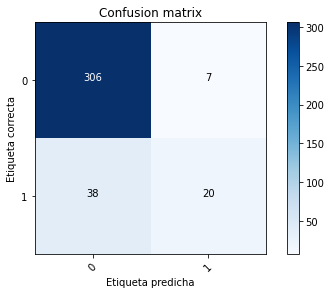

In [79]:
plot_confusion_matrix(cm, [0,1])

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [80]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=5, shuffle=True)

for train_index, val_index in kf.split(X):
    X_train, X_test = X[train_index], X[val_index]
    y_train, y_test = y[train_index], y[val_index]
    #print(f"TRAIN: {train_index} VAL: {val_index} {y_test}")

In [153]:
grid = {
    'l1_ratio': np.arange(0,1,0.01),
    'penalty': ['l2','l1','elasticnet'],
    'loss': ['hinge','log','squared_loss']}

In [154]:
model = SGDClassifier()

grid_model = GridSearchCV(estimator = model,
                    param_grid = grid,
                    scoring = 'accuracy',
                   cv = 5)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'loss': ['hinge', 'log', 'squared_loss'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [155]:
results = grid_model.cv_results_
print(results.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_l1_ratio', 'param_loss', 'param_penalty', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


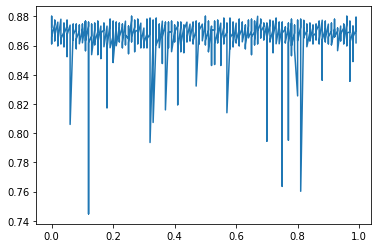

In [156]:
plt.plot(results['param_l1_ratio'].data,results['mean_test_score'])

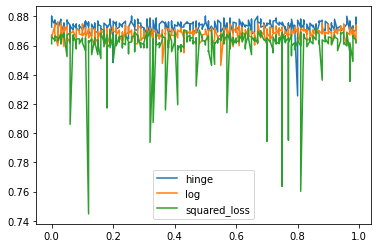

In [157]:
for j in grid['loss']:
    x = []
    y = []
    for i in range(len(results['param_loss'].data)):
        if (results['param_loss'].data[i] == j):
            x.append(results['param_l1_ratio'].data[i])
            y.append(results['mean_test_score'][i])
    plt.plot(x,y,label=j)
    #plt.show()
plt.legend()

In [158]:
print(grid_model.best_estimator_)
print(grid_model.best_estimator_.score(X_train, y_train))
print(grid_model.best_estimator_.score(X_test, y_test))

SGDClassifier(l1_ratio=0.5, penalty='l1')
0.8712938005390836
0.8432432432432433


In [159]:
y_train_pred = grid_model.best_estimator_.predict(X_train)
y_test_pred  = grid_model.best_estimator_.predict(X_test)

In [160]:
precision_score(y_test, y_test_pred)

1.0

In [161]:
recall_score(y_test, y_test_pred)

0.19444444444444445

In [162]:
f1_score(y_test, y_test_pred)

0.32558139534883723

In [163]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[298   0]
 [ 58  14]]


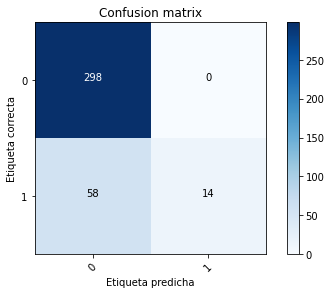

In [164]:
plot_confusion_matrix(cm, [0,1])

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [184]:
from sklearn.tree import DecisionTreeClassifier

In [185]:
model = DecisionTreeClassifier(random_state=0)

model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [186]:
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

In [187]:
print('Train Accuracy: ', np.sum(y_train_pred == y_train)/len(y_train))
print('Test Accuracy: ', np.sum(y_test_pred == y_test)/len(y_test))

Train Accuracy:  1.0
Test Accuracy:  0.8729729729729729


In [188]:
# Evaluación (evaluate):
train_error_multiple = mean_squared_error(y_train, y_train_pred)
test_error_multiple = mean_squared_error(y_test, y_test_pred)
print(f'Train error:{train_error_multiple:0.3}')
print(f'Test error:{test_error_multiple:0.3}')

Train error:0.0
Test error:0.127


In [189]:
precision_score(y_test, y_test_pred)

0.6811594202898551

In [190]:
recall_score(y_test, y_test_pred)

0.6527777777777778

In [191]:
f1_score(y_test, y_test_pred)

0.6666666666666667

In [192]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[276  22]
 [ 25  47]]


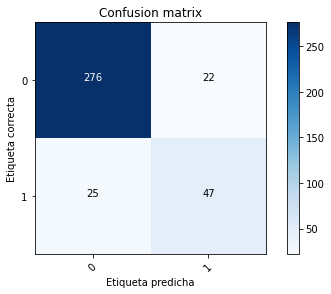

In [193]:
plot_confusion_matrix(cm, [0,1])

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [194]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2],
}

In [196]:

model = DecisionTreeClassifier(random_state=0)

grid_model = GridSearchCV(estimator = model,
                    param_grid = grid,
                    scoring = 'accuracy',
                   cv = 5)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2]},
             scoring='accuracy')

In [197]:
results = grid_model.cv_results_
print(results.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


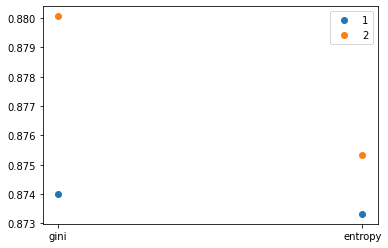

In [204]:
for j in grid['max_depth']:
    x = []
    y = []
    for i in range(len(results['param_max_depth'].data)):
        if (results['param_max_depth'].data[i] == j):
            x.append(results['param_criterion'].data[i])
            y.append(results['mean_test_score'][i])
    plt.plot(x,y,'o',label=j)
    #plt.show()
plt.legend()

In [205]:
print(grid_model.best_estimator_)
print(grid_model.best_estimator_.score(X_train, y_train))
print(grid_model.best_estimator_.score(X_test, y_test))

DecisionTreeClassifier(max_depth=2, random_state=0)
0.8881401617250674
0.8567567567567568


In [206]:
y_train_pred = grid_model.best_estimator_.predict(X_train)
y_test_pred  = grid_model.best_estimator_.predict(X_test)

In [207]:
precision_score(y_test, y_test_pred)

0.9523809523809523

In [208]:
recall_score(y_test, y_test_pred)

0.2777777777777778

In [209]:
f1_score(y_test, y_test_pred)

0.4301075268817204

In [210]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[297   1]
 [ 52  20]]


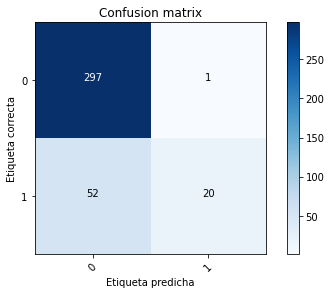

In [211]:
plot_confusion_matrix(cm, [0,1])